Epoch 1/5


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5500 - loss: 0.6870 - val_accuracy: 0.5667 - val_loss: 0.6863
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5571 - loss: 0.6859 - val_accuracy: 0.5500 - val_loss: 0.6854
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5643 - loss: 0.6848 - val_accuracy: 0.5500 - val_loss: 0.6846
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5643 - loss: 0.6836 - val_accuracy: 0.5500 - val_loss: 0.6838
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5643 - loss: 0.6826 - val_accuracy: 0.5333 - val_loss: 0.6830
Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4786 - loss: 0.6948 - val_accuracy: 0.5333 - val_loss: 0.6836
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5357 - loss: 0.6859 - val_accuracy: 0.5833 - val_loss: 0.6751
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5714 - loss: 0.6741 - val_accuracy: 0.6167 - val_loss: 0.6661
Epoch 4/5
9/9 ━━━━━━━━━

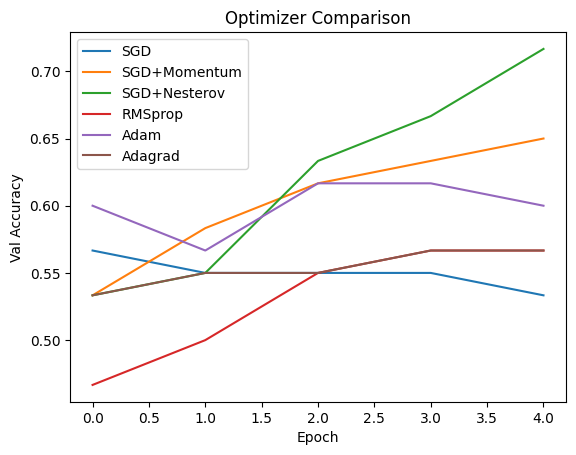

SGD         : 0.5333
SGD+Momentum: 0.6500
SGD+Nesterov: 0.7167
RMSprop     : 0.5667
Adam        : 0.6000
Adagrad     : 0.5667


In [2]:
import numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 1. Toy dataset
np.random.seed(42)
X = np.random.rand(200,10).astype("float32")
y = (np.sum(X,axis=1) > 5).astype("int32")
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# 2. Optimizers to compare
opts = {
    'SGD': tf.keras.optimizers.SGD(0.01),
    'SGD+Momentum': tf.keras.optimizers.SGD(0.01,momentum=0.9),
    'SGD+Nesterov': tf.keras.optimizers.SGD(0.01,momentum=0.9,nesterov=True),
    'RMSprop': tf.keras.optimizers.RMSprop(0.001),
    'Adam': tf.keras.optimizers.Adam(0.001),
    'Adagrad': tf.keras.optimizers.Adagrad(0.01)
}

# 3. Train + record validation accuracy
histories = {}
for name,opt in opts.items():
    tf.random.set_seed(42)  # reset weights
    model = Sequential([
        Dense(32, activation='relu', input_shape=(10,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    h = model.fit(X_train,y_train,epochs=5,batch_size=16,validation_data=(X_test,y_test))
    histories[name] = h.history['val_accuracy']

# 4. Plot results
for name,acc in histories.items():
    plt.plot(acc,label=name)
plt.xlabel("Epoch"); plt.ylabel("Val Accuracy")
plt.title("Optimizer Comparison")
plt.legend(); plt.show()

# 5. Print final accuracy
for name,acc in histories.items():
    print(f"{name:12}: {acc[-1]:.4f}")
